In [1]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
def MLP(df):
    X = df.drop('diagnostico', axis=1)
    y = df['diagnostico']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    params_grid = {
        'hidden_layer_sizes': [(50,50), (100,100), (150,150)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }

    classifier = MLPClassifier(random_state=42, max_iter=100)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_classifier = GridSearchCV(classifier, params_grid, scoring='accuracy', cv=cv)
    grid_classifier.fit(X_val, y_val)
    
    best_parameters = grid_classifier.best_params_

    model = MLPClassifier(**best_parameters, random_state=42, max_iter=100)

    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, pred)
    
    print(test_accuracy)    
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Sepse', 'Com Sepse'], yticklabels=['Sem Sepse', 'Com Sepse'])
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão')
    plt.show()


In [3]:
def MLP_Over(df):
    X = df.drop('diagnostico', axis=1)
    y = df['diagnostico']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    oversampler = RandomOverSampler(random_state=42)
    X_train, y_train = oversampler.fit_resample(X_train, y_train)
    X_val, y_val = oversampler.fit_resample(X_val, y_val)

    params_grid = {
        'hidden_layer_sizes': [(50,50), (100,100), (150,150)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }

    classifier = MLPClassifier(random_state=42, max_iter=100)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    grid_classifier = GridSearchCV(classifier, params_grid, scoring='accuracy', cv=cv)
    grid_classifier.fit(X_val, y_val)
    
    best_parameters = grid_classifier.best_params_

    model = MLPClassifier(**best_parameters, random_state=42, max_iter=100)

    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, pred)
    
    print(test_accuracy)    
    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Sem Sepse', 'Com Sepse'], yticklabels=['Sem Sepse', 'Com Sepse'])
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão')
    plt.show()


Valores Normais

In [4]:
df_normal = pd.read_csv('df_normal.csv')

0.9926295137600085
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18720
           1       0.00      0.00      0.00       139

    accuracy                           0.99     18859
   macro avg       0.50      0.50      0.50     18859
weighted avg       0.99      0.99      0.99     18859

[[18720     0]
 [  139     0]]


/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

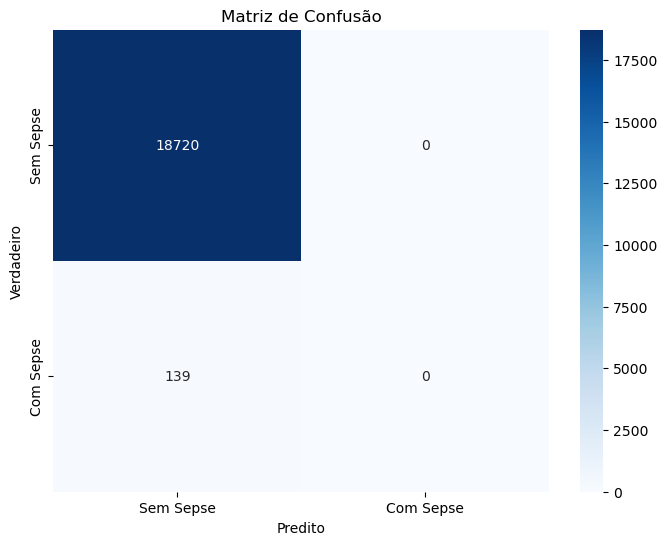

In [5]:
MLP(df_normal)

/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

0.0074235113208547645
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     18720
           1       0.01      1.00      0.01       139

    accuracy                           0.01     18859
   macro avg       0.50      0.50      0.01     18859
weighted avg       0.99      0.01      0.00     18859

[[    1 18719]
 [    0   139]]


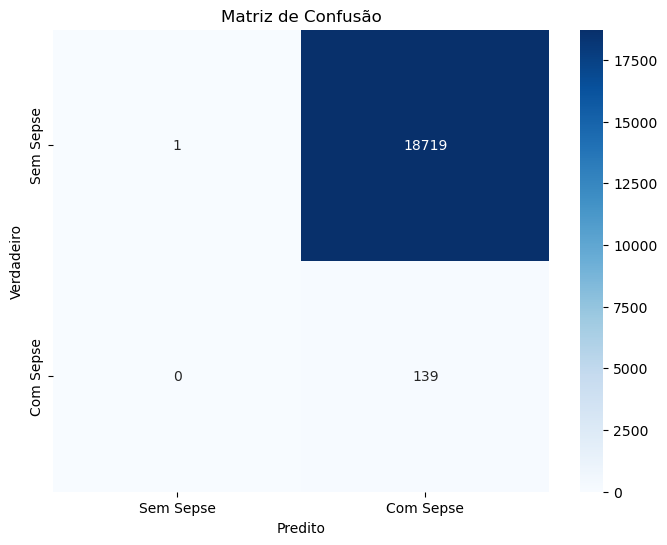

In [6]:
MLP_Over(df_normal)

KNN

In [7]:
df_knn = pd.read_csv('df_knn.csv')

0.9926295137600085
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18720
           1       0.00      0.00      0.00       139

    accuracy                           0.99     18859
   macro avg       0.50      0.50      0.50     18859
weighted avg       0.99      0.99      0.99     18859

[[18720     0]
 [  139     0]]


/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

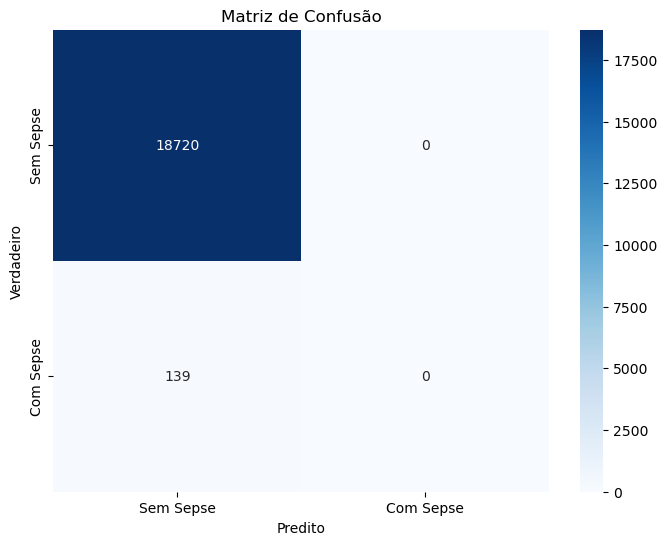

In [8]:
MLP(df_knn)

In [9]:
MLP_Over(df_knn)

/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/grad/si/22/aliciachaves/miniconda3/envs/uti/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

Media

In [ ]:
df_media = pd.read_csv('df_media.csv')

In [ ]:
MLP(df_media)

In [ ]:
MLP_Over(df_media)

Mediana

In [ ]:
df_mediana = pd.read_csv('df_mediana.csv')

In [ ]:
MLP(df_mediana)

In [ ]:
MLP_Over(df_mediana)

Moda

In [ ]:
df_moda = pd.read_csv('df_moda.csv')

In [ ]:
MLP(df_moda)

In [ ]:
MLP_Over(df_moda)

Regressão

In [ ]:
df_regressao = pd.read_csv('df_regressao.csv')

In [ ]:
MLP(df_regressao)

In [ ]:
MLP_Over(df_regressao)